<a href="https://colab.research.google.com/github/Song-Hyunsub/2024KWCsharpT8/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2%EC%B0%A8%EC%8B%9C_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

의사결정트리를 만드는 과정  
[1] 엔트로피가 가장 많이 줄어드는 방법으로 데이터를 나눈다.  
주의!) 데이터를 속성을 기준으로 나누면 데이터 분포가 바뀜!  
[2] 다른 속성 기준으로 다시 데이터를 나눈다.  
[3] 엔트로피가 0이 될 때까지 과정을 반복한다. (계속 반복하지는 않음)  
[4] leaf에 도달한다.  
- 의사결정트리의 핵심  
정보 이득 : 줄어든 엔트로피의 차이  
정보 이득이 최대가 되도록 가지치기를 하여 데이터를 나누어야 함  
  
엔트로피의 정의 공식  
-sum(from i=1 to n) p(xi) log_2p(xi)  
summation : 정보의 기댓값 (평균값)   
log_2() : 정보를 표현하기 위해서 필요한 비트 수 확인 가능  
* 확률 p란? 전체 데이터에서 특정 데이터가 차지하는 비율  
  
필요한 정보의 공간이 클수록 => 엔트로피가 크다.  
필요한 모든 bit의 수를 평균한 값 = 엔트로피  
- => 지수를 양수로 만들기 위해 씌워준 것이다.  
정보엔트로피 H  = 정보의 기댓값
i => 물건의 종류  
ex) 빨간색/파란색 => i=2  
p(x_i) = 전체 데이터에서 해당 종류의 데이터를 뽑을 확률  
  
확률이 1 => 엔트로피 0  
  
* 정보이득 (Information Gain)  
엔트로피(T) - 엔트로피(A)  
  
정보 이득 순서 : 타겟값에 영향을 미치는 변수의 순서  
  
* 예시 꼭 풀어볼 것!)  
  
QA) 정보 이득은 이전 엔트로피에서 현재의 엔트로피를 뺀 값으로 많을수록 좋습니다.  
  

루트 노드 : target값에 가장 큰 영향을 미치는 변수  
데이터 분기 후 데이터 분포 바뀜 -> 다시 엔트로피 계산 -> 정보 이득 가장 높은 속성 값 찾음  
target값이란? => 나무 노드에서 리프 노드를 의미한다. => 목표값 => 클래스 변수  
클래스 범주형 데이터에 회귀분석을 결합시켜 연속값 예측 가능  
회귀분석 결합 : 의사결정트리의 leaf에다가 회귀분석의 개수 값을 예측하도록 결합  
의사결정트리의 가장 기본적 역할 : 범주형 데이터를 예측하는 것  
  
의사결정트리 알고리즘의 공통점  
(1) 엔트로피를 이용함  
(2) 지니계수를 이용함  
(3) 데이터를 나누는 방법을 이용함  
(4) 가장 영향력이 큰 속성을 이용함  
  
데이터의 불순도 평가 기준  
엔트로피 :  log가 포함되므로 속도가 느림  
 => 데이터의 불순도 희석되는 방향으로 데이터를 나눔  
지니계수 : 1 - sum(from i=1 to K) (p_i^2)  
=> 속도를 빠르게 할 수 있음  
카이제곱스퀘어 : 데이터의 독립성 검정을 위해 사용  
sqrt( sum(from i=1 to 2) sum(from j=1 to 2) (n_ij-E_ij)/E_ij )  
=> 상관관계가 가장 적도록 나누는 방법  
  
의사결정트리의 알고리즘을 약간 바꾸면 다른 모델과 결합하여 연속데이터를 예측하는 모델로 만들어 볼 수
있습니다. 예를 들면 잎사귀에 해당하는 leaf node에 범주형데이터의 label이 아니라 회귀모델의 계수가
들어가는 것입니다. ex) 회귀나무


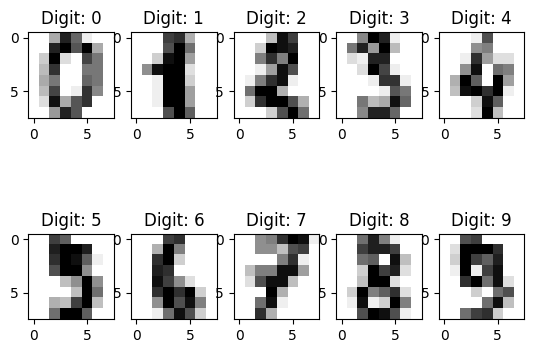

In [ ]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# [1] 데이터 읽어오기
digits = datasets.load_digits()

for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
label, img, img.shape

(9,
 array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8))

In [ ]:
images = digits.images
labels = digits.target

# 차원을 하나 줄인다.
images = images.reshape(images.shape[0], -1)

# 결정트리를 생성한다.
# [2] 모델 만들기
n_samples = len(images)
train_size = int(n_samples * 2/3)
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

# 결정트리의 성능을 확인한다.
# [3] 예측하기
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

# [4] 평가하기
print('Accuracy:\n', accuracy_score(expected, predicted)) # 실제 값과 예측 값 비교
print('Confusion matrix:\n', confusion_matrix(expected, predicted)) # 혼돈 행렬
# 아래 행렬의 대각선에 숫자가 모여있을수록 좋은 모델!

Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [ ]:
img, img.shape

(array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8))

In [ ]:
n_samples

1797

In [ ]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [ ]:
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,